<a href="https://colab.research.google.com/github/Milikitty/linearRegression/blob/main/04_hedonic_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [26]:
#1. Clean the data and perform some EDA and visualization to get to know the data set.

df = pd.read_csv('pierce_county_house_sales.csv', low_memory=False)
df.drop(['waterfront_type', 'view_quality'],axis=1, inplace=True)
df.dropna(subset=['exterior'])
df.dropna(subset=['interior'])
df.dropna(subset=['hvac_description'])
df.dropna(subset=(['roof_cover']))
df['sale_date']= pd.to_datetime(df['sale_date'])
df['log_sale_price'] = np.log(df['sale_price'])
print( df.shape, '\n')
print( df.isnull().sum(), '\n')
df.head()
print(df.columns)
print()



(16814, 18) 

sale_date                      0
sale_price                     0
house_square_feet              0
attic_finished_square_feet     0
basement_square_feet           0
attached_garage_square_feet    0
detached_garage_square_feet    0
fireplaces                     0
hvac_description               7
exterior                       1
interior                       7
stories                        0
roof_cover                     8
year_built                     0
bedrooms                       0
bathrooms                      0
utility_sewer                  0
log_sale_price                 0
dtype: int64 

Index(['sale_date', 'sale_price', 'house_square_feet',
       'attic_finished_square_feet', 'basement_square_feet',
       'attached_garage_square_feet', 'detached_garage_square_feet',
       'fireplaces', 'hvac_description', 'exterior', 'interior', 'stories',
       'roof_cover', 'year_built', 'bedrooms', 'bathrooms', 'utility_sewer',
       'log_sale_price'],
      dtype='

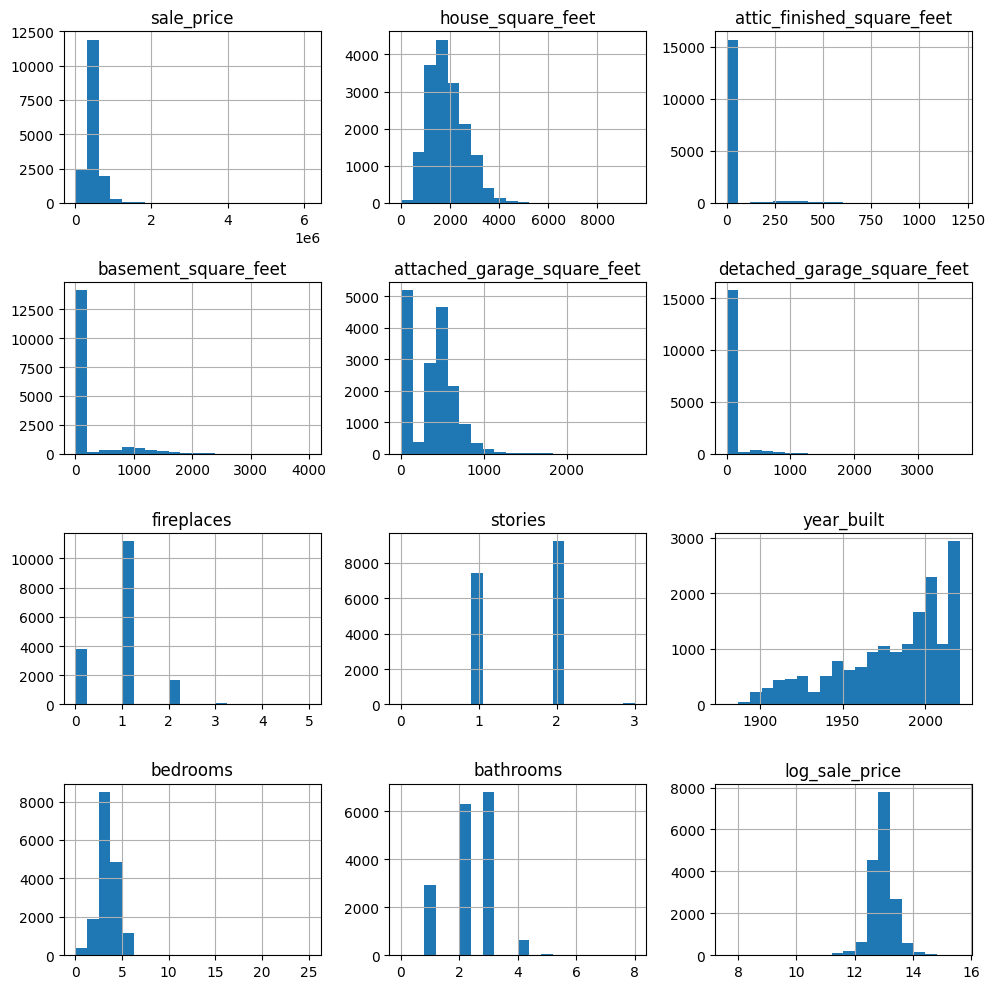

In [27]:
#EDA and visualization
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(bins=20, figsize=(10, 10))
plt.tight_layout()
plt.show()

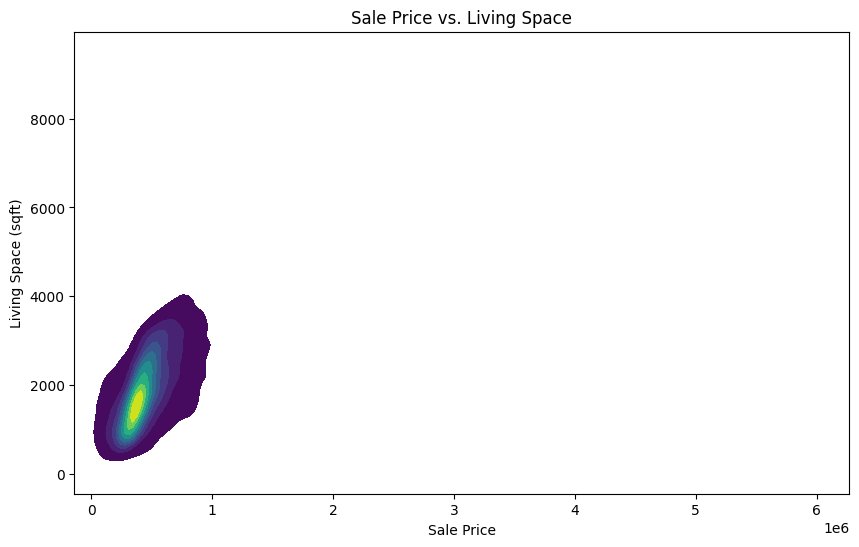

In [28]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='sale_price', y='house_square_feet', fill=True, cmap='viridis')
plt.title('Sale Price vs. Living Space')
plt.xlabel('Sale Price')
plt.ylabel('Living Space (sqft)')
plt.show()

In [29]:
#2) Transform Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(df)

#complete one-hot encoding to create dummy variables for binary things such as the presence or absence of view quality

       sale_date  sale_price  house_square_feet  attic_finished_square_feet  \
0     2020-01-02      380000               2157                           0   
1     2020-01-02      383000               2238                           0   
2     2020-01-01      419900               1452                           0   
3     2020-01-02      251660                832                           0   
4     2020-01-02      500000               1780                           0   
...          ...         ...                ...                         ...   
16809 2020-10-01        2000               3062                           0   
16810 2020-01-08       96103               1370                           0   
16811 2020-09-21      140000                850                         360   
16812 2020-05-08      203000               1894                           0   
16813 2020-11-17      150000               1040                           0   

       basement_square_feet  attached_garage_square

In [30]:
#3) Split the data into test sets
y = df['sale_price']
X = df.drop('sale_price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [31]:
#4) Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

#need to get rid of the timestamp tbh
X_train = X_train.drop('sale_date', axis=1)
X_test = X_test.drop('sale_date', axis=1)

simple_model = LinearRegression()
simple_model.fit(X_train, y_train)
y_train_pred = simple_model.predict(X_train)
y_test_pred = simple_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = np.sqrt(r2_score(y_train, y_train_pred))
test_r2 = np.sqrt(r2_score(y_test, y_test_pred))

print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train R2:', train_r2)
print('Test R2:', test_r2)



Train RMSE: 109200.3864591203
Test RMSE: 153551.8174685752
Train R2: 0.8755199473950438
Test R2: 0.8262759153970171


In [32]:
#model only using house_square feet and sale price
y = df['sale_price']
X = df[['house_square_feet', 'sale_price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

simple_model = LinearRegression()
simple_model.fit(X_train, y_train)
y_train_pred = simple_model.predict(X_train)
y_test_pred = simple_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = np.sqrt(r2_score(y_train, y_train_pred))
test_r2 = np.sqrt(r2_score(y_test, y_test_pred))

print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train R2:', train_r2)
print('Test R2:', test_r2)

Train RMSE: 4.591731043180449e-11
Test RMSE: 4.781583186902395e-11
Train R2: 1.0
Test R2: 1.0


The second model is much better. Lower RMSE value and perfect fit. Though... I think that this was an overfitted model

In [33]:
#5)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
y = df['sale_price']
X = df[['house_square_feet', 'year_built']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

poly_model = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_model.fit_transform(X_train)
X_test_poly = poly_model.transform(X_test)

X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_model.get_feature_names_out(['house_square_feet', 'year_built']))
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_model.get_feature_names_out(['house_square_feet', 'year_built']))

poly_model = LinearRegression()
poly_model.fit(X_train_poly_df, y_train)

y_train_pred_poly = poly_model.predict(X_train_poly_df)
y_test_pred_poly = poly_model.predict(X_test_poly_df)

train_rmse_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
test_rmse_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))
train_r2_poly = r2_score(y_train, y_train_pred_poly)
test_r2_poly = r2_score(y_test, y_test_pred_poly)

print('Polynomial Model Results:')
print('Train RMSE:', train_rmse_poly)
print('Test RMSE:', test_rmse_poly)
print('Train R2:', train_r2_poly)
print('Test R2:', test_r2_poly)

Polynomial Model Results:
Train RMSE: 189026.93464767333
Test RMSE: 223357.66928608614
Train R2: 0.30044722555852077
Test R2: 0.32869753856467265


In [35]:
#Using a complex model with transformations

poly = PolynomialFeatures(interaction_only = True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

complex_model = LinearRegression()
complex_model.fit(X_train_poly, y_train)

y_train_pred_complex = complex_model.predict(X_train_poly)
y_test_pred_complex = complex_model.predict(X_test_poly)

train_complex_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_complex))
test_complex_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_complex))
train_complex_r2 = r2_score(y_train, y_train_pred_complex)
test_complex_r2 = r2_score(y_test, y_test_pred_complex)

print('Complex Model Results:')
print('Train RMSE:', train_complex_rmse)
print('Test RMSE:', test_complex_rmse)
print('Train R2:', train_complex_r2)
print('Test R2:', test_complex_r2)

Complex Model Results:
Train RMSE: 191828.22581686042
Test RMSE: 230885.05510020873
Train R2: 0.2795594978818189
Test R2: 0.2826879173884541


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

y = df['sale_price']
X = df[['house_square_feet']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

rf_model = RandomForestRegressor(n_estimators=100, random_state=100)
rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print('Random Forest Model Results:')
print('Train RMSE:', train_rmse_rf)
print('Test RMSE:', test_rmse_rf)
print('Train R2:', train_r2_rf)
print('Test R2:', test_r2_rf)

Random Forest Model Results:
Train RMSE: 158557.35393664305
Test RMSE: 238204.1129295671
Train R2: 0.5077951609509093
Test R2: 0.2364895014663153


The model utilizing complex features is a bit better but not really the best. It has modest predictive value and modestly explains the data but given the wide confidence intervals with all of these I believe that it's user issues and mistakes on my part or some other variable missing

6). I would say that adding more complex variables would tell you whether or not the model is actually good as the simple models could be coerced to giving better values than it actually has. I think that this illustrates the need for using a variety of tactics to handle data and analyze regressions.